In [1]:
"""
Notebook usage: 

Plots:
    1. Average throughput for all sharding scenarios from all experiments.
    2. Average throughput for 2 and 3 shards scenarios from all experiments.
    3. Box plots and some additional informations about some scenarios

Setup:
    In order to run, change the DATA_PATHS to corresponding files.
    Additionally, for all files, the starting time needs to be subtracted from each data record, for example:
    with start: 2022-02-06 14:14:20.868178 the line should be:
    df_responses2_1["time"] = df_responses2_1["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,14,14,20,868178))

Note: it is not guaranteed that the plotting will work for new data. Some of the variables where changed by hand,
 and need to be changed again when new data is plotted.
"""
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import numpy as np
DATA_PATH0_1 = "Results_benchmarks1\Sorted_Results2_Shards1_06-02-2022_16-47-31.txt.csv"
DATA_PATH0_2 = "Results_benchmarks2\Sorted_Results5_Shards1_06-02-2022_18-48-31.txt.csv"
DATA_PATH0_3 = "Results_benchmarks3\Sorted_Results8_Shards1_06-02-2022_23-17-05.txt.csv"

DATA_PATH2_1 = "Results_benchmarks1\Sorted_Results0_Shards2_06-02-2022_15-27-23.txt.csv"
DATA_PATH2_2 = "Results_benchmarks2\Sorted_Results3_Shards2_06-02-2022_17-21-53.txt.csv"
DATA_PATH2_3 = "Results_benchmarks3\Sorted_Results6_Shards2_06-02-2022_22-04-01.txt.csv"

DATA_PATH3_1 = "Results_benchmarks1\Sorted_Results1_Shards3_06-02-2022_16-06-34.txt.csv"
DATA_PATH3_2 = "Results_benchmarks2\Sorted_Results4_Shards3_06-02-2022_18-09-59.txt.csv"
DATA_PATH3_3 = "Results_benchmarks3\Sorted_Results7_Shards3_06-02-2022_22-38-15.txt.csv"

1508.9820056497176
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64
1546.4637653478853
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64
1546.3492961876836
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64


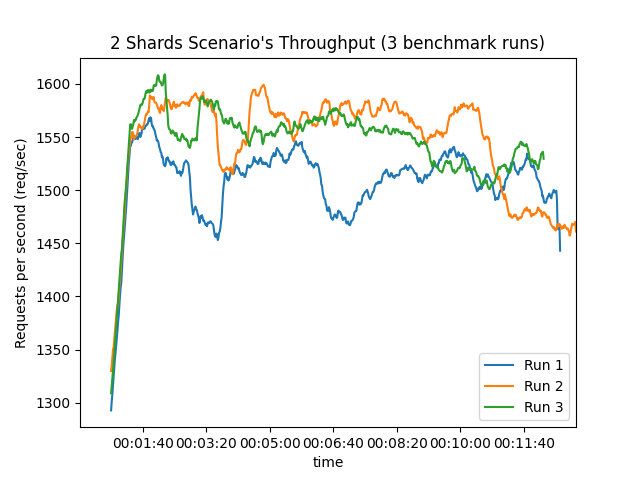

In [2]:
# 2 Shards

df2_1: pd.DataFrame = pd.DataFrame()
df2_1: pd.DataFrame = pd.read_csv(DATA_PATH2_1)
df_responses2_1 = df2_1[df2_1.action == "ReceivedResponse"]
df_responses2_1 = df_responses2_1[["time","latency"]]
df_responses2_1["time"] = pd.to_datetime(df_responses2_1["time"])
# Start: 2022-02-06 14:14:20.635969
df_responses2_1["time"] = df_responses2_1["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,14,14,20,868178))
df_responses2_1 = df_responses2_1.set_index("time")
seconds2_1 = df_responses2_1.latency.resample("S").count()
seconds2_1 = seconds2_1.rolling(50).mean()
print(seconds2_1.mean())
print(seconds2_1.head(10))
ax = seconds2_1.plot(label="No Shards", ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="2 Shards Scenario's Throughput (3 benchmark runs)")

df2_2: pd.DataFrame = pd.DataFrame()
df2_2: pd.DataFrame = pd.read_csv(DATA_PATH2_2)
df_responses2_2 = df2_2[df2_2.action == "ReceivedResponse"]
df_responses2_2 = df_responses2_2[["time","latency"]]
df_responses2_2["time"] = pd.to_datetime(df_responses2_2["time"])
# Start: 2022-02-06 16:08:49.556124
df_responses2_2["time"] = df_responses2_2["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,16,8,49,556124 + 342387))
df_responses2_2 = df_responses2_2.set_index("time")
seconds2_2 = df_responses2_2.latency.resample("S").count()
seconds2_2 = seconds2_2.rolling(50).mean()
print(seconds2_2.mean())
print(seconds2_2.head(10))
seconds2_2.plot(label="No Shards", ax=ax)

df2_3: pd.DataFrame = pd.DataFrame()
df2_3: pd.DataFrame = pd.read_csv(DATA_PATH2_3)
df_responses2_3 = df2_3[df2_3.action == "ReceivedResponse"]
df_responses2_3 = df_responses2_3[["time","latency"]]
df_responses2_3["time"] = pd.to_datetime(df_responses2_3["time"])
# Start: 2022-02-06 20:50:57.016553
df_responses2_3["time"] = df_responses2_3["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,20,50,57,16553+221779))
df_responses2_3 = df_responses2_3.set_index("time")
seconds2_3 = df_responses2_3.latency.resample("S").count()
seconds2_3 = seconds2_3.rolling(50).mean()
print(seconds2_3.mean())
print(seconds2_3.head(10))
seconds2_3.plot(label="No Shards", ax=ax)


plt.legend((["Run 1", "Run 2", "Run 3"]),loc='lower right')
plt.show()

1524.9023529411766
time
0 days 00:00:00   NaN
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
Freq: S, Name: latency, dtype: float64
1617.4258022690437
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64
1610.945349544073
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64


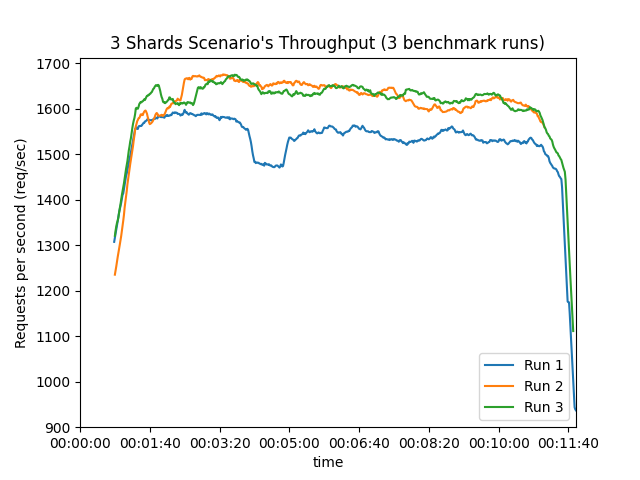

In [99]:
# 3 Shards
plt.clf()
df3_1: pd.DataFrame = pd.DataFrame()
df3_1: pd.DataFrame = pd.read_csv(DATA_PATH3_1)
df_responses3_1 = df3_1[df3_1.action == "ReceivedResponse"]
df_responses3_1 = df_responses3_1[["time","latency"]]
df_responses3_1["time"] = pd.to_datetime(df_responses3_1["time"])
# Start: 2022-02-06 14:54:30.959190
df_responses3_1["time"] = df_responses3_1["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,14,54,32,290745))
df_responses3_1 = df_responses3_1.set_index("time")
seconds3_1 = df_responses3_1.latency.resample("S").count()
seconds3_1 = seconds3_1.rolling(50).mean()
print(seconds3_1.mean())
print(seconds3_1.head(10))
ax = seconds3_1.plot(label="No Shards", ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="3 Shards Scenario's Throughput (3 benchmark runs)")

df3_2: pd.DataFrame = pd.DataFrame()
df3_2: pd.DataFrame = pd.read_csv(DATA_PATH3_2)
df_responses3_2 = df3_2[df3_2.action == "ReceivedResponse"]
df_responses3_2 = df_responses3_2[["time","latency"]]
df_responses3_2["time"] = pd.to_datetime(df_responses3_2["time"])
# Start: 2022-02-06 16:57:55.438131
df_responses3_2["time"] = df_responses3_2["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,16,57,55,438131+313715))
df_responses3_2 = df_responses3_2.set_index("time")
seconds3_2 = df_responses3_2.latency.resample("S").count()
seconds3_2 = seconds3_2.rolling(50).mean()
print(seconds3_2.mean())
print(seconds3_2.head(10))
seconds3_2.plot(label="No Shards", ax= ax)

df3_3: pd.DataFrame = pd.DataFrame()
df3_3: pd.DataFrame = pd.read_csv(DATA_PATH3_3)
df_responses3_3 = df3_3[df3_3.action == "ReceivedResponse"]
df_responses3_3 = df_responses3_3[["time","latency"]]
df_responses3_3["time"] = pd.to_datetime(df_responses3_3["time"])
# Start: 2022-02-06 21:26:11.309608
df_responses3_3["time"] = df_responses3_3["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,21,26,11,309608+196212))
df_responses3_3 = df_responses3_3.set_index("time")
seconds3_3 = df_responses3_3.latency.resample("S").count()
seconds3_3 = seconds3_3.rolling(50).mean()
print(seconds3_3.mean())
print(seconds3_3.head(10))
seconds3_3.plot(label="No Shards", ax=ax)

plt.legend((["Run 1", "Run 2", "Run 3"]),loc='lower right')
plt.show()

6732.552634920635
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64
6884.52308994709
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64
6720.340275132276
time
0 days 00:00:01   NaN
0 days 00:00:02   NaN
0 days 00:00:03   NaN
0 days 00:00:04   NaN
0 days 00:00:05   NaN
0 days 00:00:06   NaN
0 days 00:00:07   NaN
0 days 00:00:08   NaN
0 days 00:00:09   NaN
0 days 00:00:10   NaN
Freq: S, Name: latency, dtype: float64


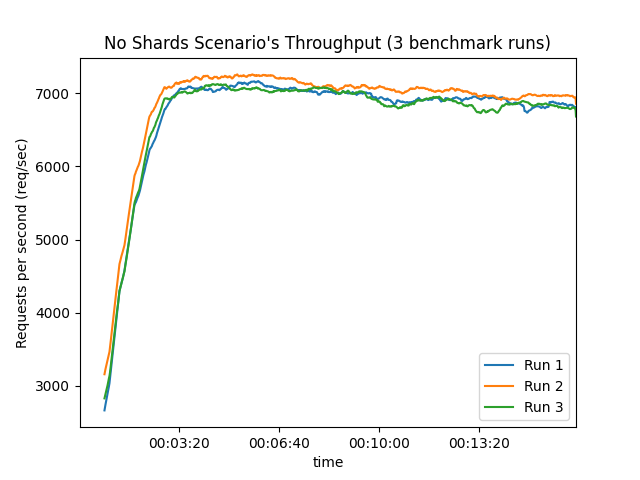

In [3]:
# 0 Shards
plt.clf()
df1_1: pd.DataFrame = pd.DataFrame()
df1_1: pd.DataFrame = pd.read_csv(DATA_PATH0_1)
df_responses1_1 = df1_1[df1_1.action == "ReceivedResponse"]
df_responses1_1 = df_responses1_1[["time","latency"]]
df_responses1_1["time"] = pd.to_datetime(df_responses1_1["time"])
# Start: 2022-02-06 15:30:54.399576
df_responses1_1["time"] = df_responses1_1["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,15,30,54,399576+284980))
df_responses1_1 = df_responses1_1.set_index("time")
seconds1_1 = df_responses1_1.latency.resample("S").count()
seconds1_1 = seconds1_1.rolling(50).mean()
print(seconds1_1.mean())
print(seconds1_1.head(10))
ax = seconds1_1.plot(label="No Shards", ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="No Shards Scenario's Throughput (3 benchmark runs)")
ax.plot()

df1_2: pd.DataFrame = pd.DataFrame()
df1_2: pd.DataFrame = pd.read_csv(DATA_PATH0_2)
df_responses1_2 = df1_2[df1_2.action == "ReceivedResponse"]
df_responses1_2 = df_responses1_2[["time","latency"]]
df_responses1_2["time"] = pd.to_datetime(df_responses1_2["time"])
# Start: 2022-02-06 17:31:55.013016
df_responses1_2["time"] = df_responses1_2["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,17,31,55,13016+224341))
df_responses1_2 = df_responses1_2.set_index("time")
seconds1_2 = df_responses1_2.latency.resample("S").count()
seconds1_2 = seconds1_2.rolling(50).mean()
print(seconds1_2.mean())
print(seconds1_2.head(10))
seconds1_2.plot(label="No Shards", ax=ax)

df1_3: pd.DataFrame = pd.DataFrame()
df1_3: pd.DataFrame = pd.read_csv(DATA_PATH0_3)
df_responses1_3 = df1_3[df1_3.action == "ReceivedResponse"]
df_responses1_3 = df_responses1_3[["time","latency"]]
df_responses1_3["time"] = pd.to_datetime(df_responses1_3["time"])
# Start: 2022-02-06 22:00:28.762505
df_responses1_3["time"] = df_responses1_3["time"].apply(lambda x: x-datetime.datetime(2022, 2, 6,22,00,28,762505+203287))
df_responses1_3 = df_responses1_3.set_index("time")
seconds1_3 = df_responses1_3.latency.resample("S").count()
seconds1_3 = seconds1_3.rolling(50).mean()
print(seconds1_3.mean())
print(seconds1_3.head(10))
seconds1_3.plot(label="No Shards", ax=ax)

plt.legend((["Run 1", "Run 2", "Run 3"]),loc='lower right')
plt.show()

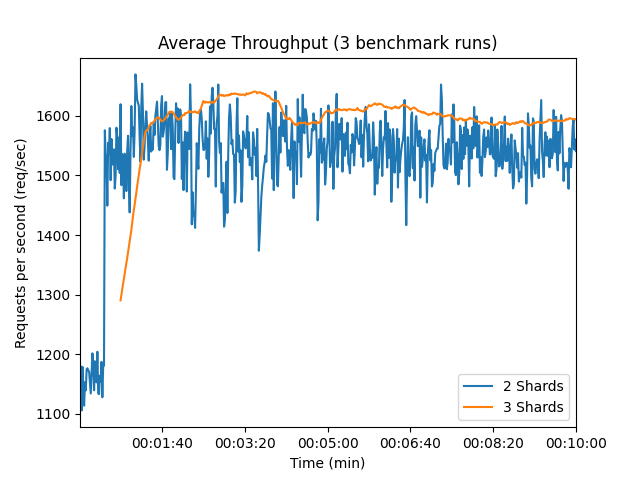

In [46]:
"""
Procudes a plot for 2 and 3 shards (average from 3 experiments)
"""
time = timedelta(0,1)
sec = []
val = []
dt = pd.DataFrame()
for i in range(600):
    sec.append(time)
    string: str = str(time)
    value1 = seconds2_1["0 days "+string]
    value2 = seconds2_2["0 days "+string]
    value3 = seconds2_3["0 days "+string]
    value = np.mean([value1 ,value2, value3])
    val.append(value)
    time = time + timedelta(0,1)
finalDF2 = pd.DataFrame(val, sec)

time = timedelta(0,1)
sec = []
val = []
dt = pd.DataFrame()
for i in range(600):
    sec.append(time)
    string: str = str(time)
    value1 = seconds3_1["0 days "+string]
    value2 = seconds3_2["0 days "+string]
    value3 = seconds3_3["0 days "+string]
    value = np.mean([value1 ,value2, value3])
    val.append(value)
    time = time + timedelta(0,1)
finalDF3 = pd.DataFrame(val, sec)

ax = finalDF2.plot(ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="Average Throughput (3 benchmark runs)")
finalDF3.plot(ax=ax)
plt.legend((["2 Shards", "3 Shards"]),loc='lower right')
plt.show()

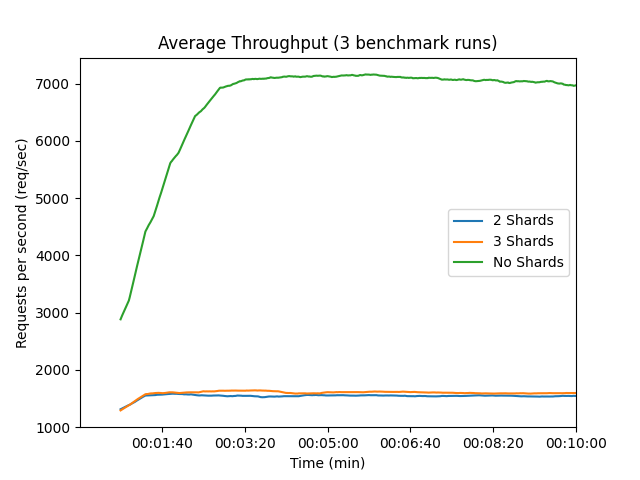

In [74]:
"""
Procudes a plot for 2 and 3 shards (average from 3 experiments)
"""
time = timedelta(0,1)
sec = []
val = []
dt = pd.DataFrame()
for i in range(600):
    sec.append(time)
    string: str = str(time)
    value1 = seconds2_1["0 days "+string]
    value2 = seconds2_2["0 days "+string]
    value3 = seconds2_3["0 days "+string]
    value = np.mean([value1 ,value2, value3])
    val.append(value)
    time = time + timedelta(0,1)
finalDF2 = pd.DataFrame(val, sec)

time = timedelta(0,1)
sec = []
val = []
dt = pd.DataFrame()
for i in range(600):
    sec.append(time)
    string: str = str(time)
    value1 = seconds3_1["0 days "+string]
    value2 = seconds3_2["0 days "+string]
    value3 = seconds3_3["0 days "+string]
    value = np.mean([value1 ,value2, value3])
    val.append(value)
    time = time + timedelta(0,1)
finalDF3 = pd.DataFrame(val, sec)

time = timedelta(0,1)
sec = []
val = []
dt = pd.DataFrame()
for i in range(600):
    sec.append(time)
    string: str = str(time)
    value1 = seconds1_1["0 days "+string]
    value2 = seconds1_2["0 days "+string]
    value3 = seconds1_3["0 days "+string]
    value = np.mean([value1 ,value2, value3])
    val.append(value)
    time = time + timedelta(0,1)
finalDF1 = pd.DataFrame(val, sec)

ax = finalDF2.plot(ylabel= "Requests per second (req/sec)", xlabel="Time (min)", title="Average Throughput (3 benchmark runs)")
finalDF3.plot(ax=ax)
finalDF1.plot(ax=ax)
plt.legend((["2 Shards", "3 Shards", "No Shards"]),loc='center right')
plt.show()

Mean of no shards: 0    7086.768683
dtype: float64
Mean of 2 shards: 0    1546.519872
dtype: float64
Mean of 3 shards: 0    1604.930397
dtype: float64
Max of no shards: 0    7162.7
dtype: float64
Max of 2 shards: 0    1652.666667
dtype: float64
Max of 3 shards: 0    1640.706667
dtype: float64


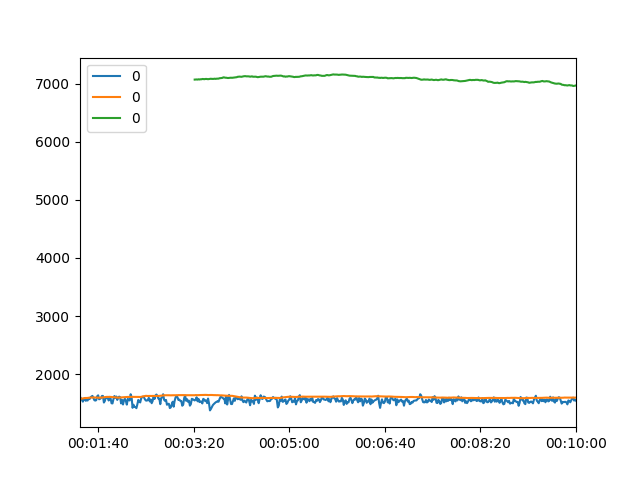

In [47]:
# Calculate the values for maximum average throughput and maximum throughput.
plt.clf()
cut_1 = finalDF1.tail(-200)
cut_2 = finalDF2.tail(-80)
cut_3 = finalDF3.tail(-80)
cut_ax = cut_2.plot()
cut_3.plot(ax=cut_ax)
cut_1.plot(ax=cut_ax)
print(f"Mean of no shards: {cut_1.mean()}")
print(f"Mean of 2 shards: {cut_2.mean()}")
print(f"Mean of 3 shards: {cut_3.mean()}")
print(f"Max of no shards: {cut_1.max()}")
print(f"Max of 2 shards: {cut_2.max()}")
print(f"Max of 3 shards: {cut_3.max()}")


count     577.000000
mean     1631.627834
std        18.092402
min      1593.840000
25%      1618.720000
50%      1631.940000
75%      1644.420000
max      1674.600000
Name: latency, dtype: float64


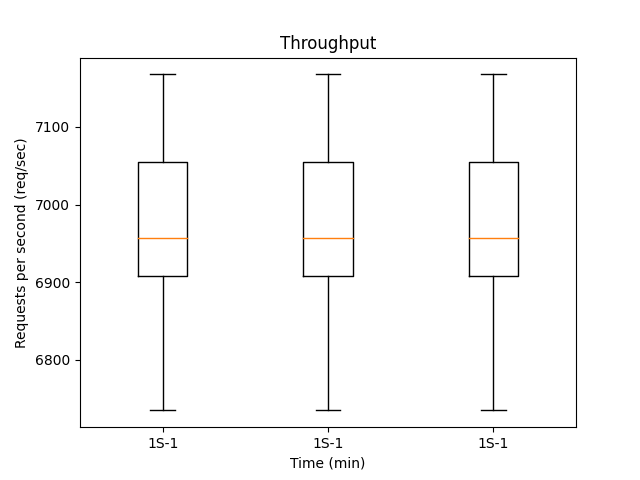

In [89]:
plt.clf()
cut_1_1 = seconds1_1.tail(-200).head(-20)
cut_1_2 = seconds1_2.tail(-200).head(-20)
cut_1_3 = seconds1_3.tail(-200).head(-20)
cut_2_1 = seconds2_1.tail(-80).head(-5)
cut_2_2 = seconds2_2.tail(-80).head(-160)
cut_2_3 = seconds2_3.tail(-80)
cut_3_1 = seconds3_1.tail(-80).head(-50)
cut_3_2 = seconds3_2.tail(-80).head(-10)
cut_3_3 = seconds3_3.tail(-80).head(-50)
print(cut_3_3.describe())
# 2 and 3 Shards

# labels=["2S-1", "2S-2", "2S-3", "3S-1", "3S-2", "3S-3"]
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.boxplot([ cut_2_1, cut_2_2, cut_2_3, cut_3_1, cut_3_2, cut_3_3], labels=labels)
# ax.set_title("Throughput")
# ax.set_ylabel("Requests per second (req/sec)")
# ax.set_xlabel("Time (min)")
# plt.show()

# All scenarios

labels=["1S-1","1S-1","1S-1"]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([ cut_1_1,cut_1_1,cut_1_1], labels=labels)
ax.set_title("Throughput")
ax.set_ylabel("Requests per second (req/sec)")
ax.set_xlabel("Time (min)")
plt.show()

# cut_ax = cut_2_2.plot()
